pytorchÂ±ÇÊ¨°ÁªìÊûÑÂèØÂàÜ‰∏∫Â¶Ç‰∏ã5Â±Ç

> ÂèÇËÄÉÔºöhttps://jackiexiao.github.io/eat_pytorch_in_20_days/3.%E5%B1%82%E6%AC%A1%E7%BB%93%E6%9E%84/

![2140.img](../pic/pt-level0.png)

‰∏ãÈù¢‰ª•Á∫øÊÄßÂõûÂΩíÊ®°Âûã‰∏∫‰æãËøõË°å‰ªãÁªç

In [22]:
import torch 
torch.__version__

'1.11.0'

In [23]:
import datetime

#ÊâìÂç∞Êó∂Èó¥
def printbar():
    nowtime = datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')
    print("\n"+"=========="*8 + "%s"%nowtime)


In [24]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt 
import torch
from torch import nn


#Ê†∑Êú¨Êï∞Èáè
n = 400

# ÁîüÊàêÊµãËØïÁî®Êï∞ÊçÆÈõÜ
X = 10*torch.rand([n,2])-5.0  #torch.randÊòØÂùáÂåÄÂàÜÂ∏É 
w0 = torch.tensor([[2.0],[-3.0]])
b0 = torch.tensor([[10.0]])
Y = X@w0 + b0 + torch.normal( 0.0,2.0,size = [n,1])  # @Ë°®Á§∫Áü©Èòµ‰πòÊ≥ï,Â¢ûÂä†Ê≠£ÊÄÅÊâ∞Âä®

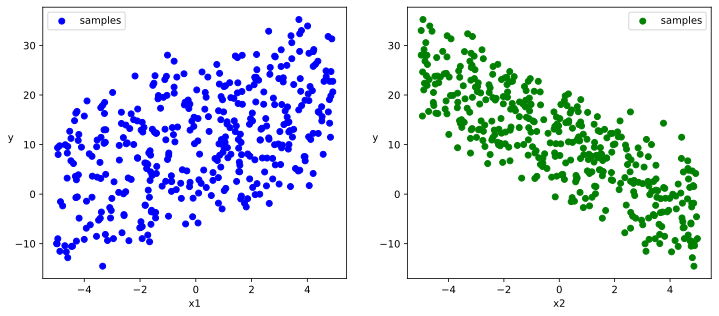

In [25]:
# Êï∞ÊçÆÂèØËßÜÂåñ

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

plt.figure(figsize = (12,5))
ax1 = plt.subplot(121)
ax1.scatter(X[:,0].numpy(),Y[:,0].numpy(), c = "b",label = "samples")
ax1.legend()
plt.xlabel("x1")
plt.ylabel("y",rotation = 0)

ax2 = plt.subplot(122)
ax2.scatter(X[:,1].numpy(),Y[:,0].numpy(), c = "g",label = "samples")
ax2.legend()
plt.xlabel("x2")
plt.ylabel("y",rotation = 0)
plt.show()

## 1. ‰ΩéÈò∂API--Ê®°Âûã‰πãüß±
![11.img](../pic/pt-level.png)

In [35]:
# ÊûÑÂª∫Êï∞ÊçÆÁÆ°ÈÅìËø≠‰ª£Âô®
batch_size = 8
def data_iter(features, labels, batch_size=batch_size):
    num_examples = len(features)
    indices = list(range(num_examples))
    np.random.shuffle(indices)  #Ê†∑Êú¨ÁöÑËØªÂèñÈ°∫Â∫èÊòØÈöèÊú∫ÁöÑ
    for i in range(0, num_examples, batch_size):
        indexs = torch.LongTensor(indices[i: min(i + batch_size, num_examples)])
        yield  features.index_select(0, indexs), labels.index_select(0, indexs)

# ÊµãËØïÊï∞ÊçÆÁÆ°ÈÅìÊïàÊûú   

(features,labels) = next(data_iter(X,Y,batch_size))
print(features)
print(labels)

tensor([[-2.0092,  4.4729],
        [ 0.3388, -2.5311],
        [-4.2587, -4.7172],
        [-3.3410,  4.8634],
        [ 0.7722,  1.5687],
        [ 3.5095,  1.6355],
        [ 2.3885,  1.7099],
        [-3.0102,  0.9464]])
tensor([[ -6.7962],
        [ 20.5120],
        [ 16.6834],
        [-14.5421],
        [  6.7809],
        [ 13.0676],
        [  7.2872],
        [ -0.8670]])


In [36]:
"""
# ÂÆö‰πâÊ®°Âûã

Ê≥®ÊÑèÔºåËøòÂèØ‰ª•Âà©Áî®nn.ModuleÊù•ÁªÑÁªáÊ®°ÂûãÂèòÈáè„ÄÇ
class DNNModel(nn.Module):
    def __init__(self):
        super(DNNModel, self).__init__()
        self.w1 = nn.Parameter(torch.randn(2,4))
        self.b1 = nn.Parameter(torch.zeros(1,4))
        self.w2 = nn.Parameter(torch.randn(4,8))
        self.b2 = nn.Parameter(torch.zeros(1,8))
        self.w3 = nn.Parameter(torch.randn(8,1))
        self.b3 = nn.Parameter(torch.zeros(1,1))
"""



class LinearRegression: 

    def __init__(self):
        self.w = torch.randn_like(w0,requires_grad=True)
        self.b = torch.zeros_like(b0,requires_grad=True)

    #Ê≠£Âêë‰º†Êí≠
    def forward(self,x): 
        return x@self.w + self.b

    # ÊçüÂ§±ÂáΩÊï∞
    def loss_func(self,y_pred,y_true):  
        return torch.mean((y_pred - y_true)**2/2)

model = LinearRegression()

In [37]:
# ËÆ≠ÁªÉÊ®°Âûã

def train_step(model, features, labels):

    predictions = model.forward(features)
    loss = model.loss_func(predictions,labels)

    # ÂèçÂêë‰º†Êí≠Ê±ÇÊ¢ØÂ∫¶
    loss.backward()

    # ‰ΩøÁî®torch.no_grad()ÈÅøÂÖçÊ¢ØÂ∫¶ËÆ∞ÂΩïÔºå‰πüÂèØ‰ª•ÈÄöËøáÊìç‰Ωú model.w.data ÂÆûÁé∞ÈÅøÂÖçÊ¢ØÂ∫¶ËÆ∞ÂΩï 
    with torch.no_grad():
        # Ê¢ØÂ∫¶‰∏ãÈôçÊ≥ïÊõ¥Êñ∞ÂèÇÊï∞
        model.w -= 0.001*model.w.grad
        model.b -= 0.001*model.b.grad

        # Ê¢ØÂ∫¶Ê∏ÖÈõ∂
        model.w.grad.zero_()
        model.b.grad.zero_()
    return loss

In [38]:
# ÊµãËØïtrain_stepÊïàÊûú
batch_size = 10
(features,labels) = next(data_iter(X,Y,batch_size))
train_step(model,features,labels)

tensor(122.8058, grad_fn=<MeanBackward0>)

In [39]:
def train_model(model,epochs):
    for epoch in range(1,epochs+1):
        for features, labels in data_iter(X,Y,batch_size):
            loss = train_step(model,features,labels)

        if epoch%200==0:
            printbar()
            print("epoch =",epoch,"loss = ",loss.item())
            print("model.w =",model.w.data)
            print("model.b =",model.b.data)

train_model(model,epochs = 1000)


================================================================================2022-04-05 23:00:07
epoch = 200 loss =  2.3715500831604004
model.w = tensor([[ 1.9761],
        [-3.0149]])
model.b = tensor([[10.2716]])

================================================================================2022-04-05 23:00:10
epoch = 400 loss =  5.309834957122803
model.w = tensor([[ 1.9786],
        [-3.0145]])
model.b = tensor([[10.2751]])

================================================================================2022-04-05 23:00:13
epoch = 600 loss =  2.6410393714904785
model.w = tensor([[ 1.9790],
        [-3.0185]])
model.b = tensor([[10.2751]])

================================================================================2022-04-05 23:00:16
epoch = 800 loss =  4.10336971282959
model.w = tensor([[ 1.9768],
        [-3.0163]])
model.b = tensor([[10.2753]])

================================================================================2022-04-05 23:00:19
epoch = 1000 loss =  1.780

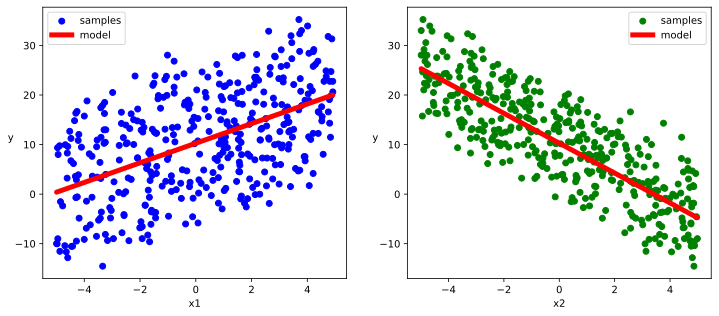

In [41]:
# ÁªìÊûúÂèØËßÜÂåñ

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

plt.figure(figsize = (12,5))
ax1 = plt.subplot(121)
ax1.scatter(X[:,0].numpy(),Y[:,0].numpy(), c = "b",label = "samples")
ax1.plot(X[:,0].numpy(),(model.w[0].data*X[:,0]+model.b[0].data).numpy(),"-r",linewidth = 5.0,label = "model")
ax1.legend()
plt.xlabel("x1")
plt.ylabel("y",rotation = 0)


ax2 = plt.subplot(122)
ax2.scatter(X[:,1].numpy(),Y[:,0].numpy(), c = "g",label = "samples")
ax2.plot(X[:,1].numpy(),(model.w[1].data*X[:,1]+model.b[0].data).numpy(),"-r",linewidth = 5.0,label = "model")
ax2.legend()
plt.xlabel("x2")
plt.ylabel("y",rotation = 0)

plt.show()

## 2. ‰∏≠Èò∂API--Ê®°Âûã‰πãÂ¢ô
PytorchÁöÑ‰∏≠Èò∂API‰∏ªË¶ÅÂåÖÊã¨ÂêÑÁßçÊ®°ÂûãÂ±ÇÔºåÊçüÂ§±ÂáΩÊï∞Ôºå‰ºòÂåñÂô®ÔºåÊï∞ÊçÆÁÆ°ÈÅìÁ≠âÁ≠â„ÄÇ
![2301](../pic/pt-middle_level.png)


In [42]:
from torch.utils.data import Dataset,DataLoader,TensorDataset

#ÊûÑÂª∫ËæìÂÖ•Êï∞ÊçÆÁÆ°ÈÅì
ds = TensorDataset(X,Y)
dl = DataLoader(ds,batch_size = 10,shuffle=True,num_workers=0)

model = nn.Linear(2,1) #Á∫øÊÄßÂ±Ç
model.loss_func = nn.MSELoss() 
model.optimizer = torch.optim.SGD(model.parameters(),lr = 0.001)


def train_step(model, features, labels):
    predictions = model(features)
    loss = model.loss_func(predictions,labels)
    loss.backward()
    model.optimizer.step()
    model.optimizer.zero_grad()
    return loss.item()

def train_model(model,epochs):
    for epoch in range(1,epochs+1):
        for features, labels in dl:
            loss = train_step(model,features,labels)
        if epoch%200==0:
            printbar()
            w = model.state_dict()["weight"]
            b = model.state_dict()["bias"]
            print("epoch =",epoch,"loss = ",loss)
            print("w =",w)
            print("b =",b)
train_model(model,epochs = 1000)


================================================================================2022-04-05 23:02:08
epoch = 200 loss =  5.706710338592529
w = tensor([[ 1.9806, -3.0185]])
b = tensor([10.2759])

================================================================================2022-04-05 23:02:14
epoch = 400 loss =  2.94909930229187
w = tensor([[ 1.9727, -3.0104]])
b = tensor([10.2749])

================================================================================2022-04-05 23:02:19
epoch = 600 loss =  3.525838851928711
w = tensor([[ 1.9739, -3.0180]])
b = tensor([10.2756])

================================================================================2022-04-05 23:02:25
epoch = 800 loss =  5.164609432220459
w = tensor([[ 1.9776, -3.0133]])
b = tensor([10.2762])

================================================================================2022-04-05 23:02:30
epoch = 1000 loss =  6.893721103668213
w = tensor([[ 1.9828, -3.0108]])
b = tensor([10.2755])


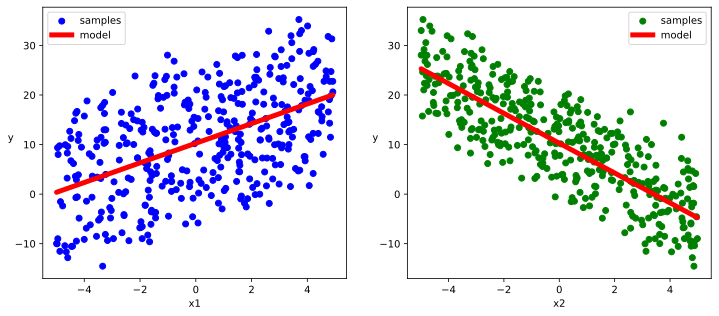

In [43]:
# ÁªìÊûúÂèØËßÜÂåñ

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

w,b = model.state_dict()["weight"],model.state_dict()["bias"]

plt.figure(figsize = (12,5))
ax1 = plt.subplot(121)
ax1.scatter(X[:,0],Y[:,0], c = "b",label = "samples")
ax1.plot(X[:,0],w[0,0]*X[:,0]+b[0],"-r",linewidth = 5.0,label = "model")
ax1.legend()
plt.xlabel("x1")
plt.ylabel("y",rotation = 0)



ax2 = plt.subplot(122)
ax2.scatter(X[:,1],Y[:,0], c = "g",label = "samples")
ax2.plot(X[:,1],w[0,1]*X[:,1]+b[0],"-r",linewidth = 5.0,label = "model")
ax2.legend()
plt.xlabel("x2")
plt.ylabel("y",rotation = 0)

plt.show()